# Exploring Classification Performance

Let's load in any libraries we will use in this notebook. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#import torch which has many of the functions to build deep learning models and to train them
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#import torchvision, which was lots of functions for loading and working with image data
import torchvision
import torchvision.transforms as transforms

#this is a nice progress bar representation that will be good to measure progress during training
import tqdm

#for creating confusion matrices from predictions
from sklearn.metrics import ConfusionMatrixDisplay



# 1) Splitting into a training and validation dataset

As we did in Week 4 and 5, we're going to load the dataset with our 20 dog species. 
I'm loading the 'train' subset, but acting as if it is a 'trainval' subset that I need to split into 'train' and 'val'.

In [2]:
# imagenet_means = (0.485, 0.456, 0.406)
# imagenet_stds = (0.229, 0.224, 0.225)

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#     transforms.Resize((224, 224)), 
#      transforms.Normalize(imagenet_means, imagenet_stds)])

In [3]:


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((224, 224)), 
     ])

trainval_dataset = torchvision.datasets.ImageFolder('../trainval', transform = transform)

In [4]:
# print(trainval_dataset.classes)

In [13]:
# finding  mean and stds

means=[]
stds=[]
for i in range(3):
    pixel_vals=[]
    for data in trainval_dataset:
        im,lbl=data
    
        pixel_vals+=im[i].flatten().tolist()
        # print(im.size())
        # break
    mean_val=np.mean(pixel_vals)
    std_val= np.std(pixel_vals)
                  
    means+=[mean_val]
    stds+=[std_val]
    
    print(f'for channel {i}:{np.mean(pixel_vals)},{np.std(pixel_vals)}')


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((224, 224)), 
     transforms.Normalize(means, stds)])


# train_dataset_= torchvision.datasets.ImageFolder('trainval', transform = transform)

for channel 0:0.42120947288954674,0.25864527820577965
for channel 1:0.3962225707505265,0.24385286992197647
for channel 2:0.32426311030462035,0.2482896783351599


In [14]:
# print(len(pixel_vals))

In [7]:
image_means=[]
image_stds=[]

In [8]:
# print(means)
# print(stds)

In [9]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#     transforms.Resize((224, 224)), 
#      transforms.Normalize(means, stds)])


# train_dataset_= torchvision.datasets.ImageFolder('trainval', transform = transform)

## 1a) Using stratify to split into train and val

In the week 2 and week 3 tutorial, we explored how to use [sklearn.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split a dataset.

Complete the code below to create a train and val dataset, with a 70/30% split of the trainval_dataset.

In [10]:
# train_portion = 0.7
# val_portion = 0.3

# all_idxes=np.arange(len(trainval_dataset))

# class_labels=trainval_dataset.targets

# train_idxes, val_idxes= train_test_split(all_idxes,train_size=train_portion,random_state=0, stratify=class_labels)







# train_dataset = torch.utils.data.Subset(trainval_dataset, train_idxes)
# val_dataset = torch.utils.data.Subset(trainval_dataset, val_idxes)

## Consider: What could be the downside of measuring performance with this validation dataset?

## 1b) Validation set with fixed samples per class

An alternative approach might be to create the validation set with a fixed number of samples, leaving all remaining data for the training set.

Below, we're going to split the dataset into train/val, always having 20 samples in the validation set.

In [11]:
num_classes = len(trainval_dataset.classes)
class_labels = trainval_dataset.classes

train_labels = [data[1] for data in train_dataset]
val_labels = [data[1] for data in val_dataset]

plt.hist([train_labels, val_labels], bins = 20, label = ['Train', 'Val']) 
plt.xlabel('Class Label')
plt.legend()
plt.xticks([i for i in range(num_classes)], class_labels, rotation=90)
plt.ylabel('Count')
plt.show()

NameError: name 'train_dataset' is not defined

In [16]:
val_samples = 20



all_idxes=np.arange(len(trainval_dataset))
gt_labels=np.array(trainval_dataset.targets)






# print(class_mask[:10],class_mask[-10:])
# print(gt_labels[:10],gt_labels[-10:])
# print(class_idxes)


train_idxes=[]
val_idxes=[]
for i in range (num_classes):
    class_mask=gt_labels==i
    
    class_idxes=all_idxes[class_mask]
    
    class_train_idxes,class_val_idxes=train_test_split(class_idxes,test_size=val_samples,random_state=0)
    train_idxes+= class_train_idxes.tolist()
    val_idxes+= class_val_idxes.tolist()
    

train_dataset = torch.utils.data.Subset(trainval_dataset,train_idxes)
val_dataset = torch.utils.data.Subset(trainval_dataset,val_idxes)

In [14]:
means=[]
stds=[]
for i in range(3):
    pixel_vals=[]
    for data in trainval_dataset:
        im,lbl=data
    
        pixel_vals+=im[i].flatten().tolist()
        # print(im.size())
        # break
    mean_val=np.mean(pixel_vals)
    std_val= np.std(pixel_vals)
                  
    means+=[mean_val]
    stds+=[std_val]
    
    print(f'for channel {i}:{np.mean(pixel_vals)},{np.std(pixel_vals)}')


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((224, 224)), 
     transforms.Normalize(means, stds)])


for channel 0:0.42120947288954674,0.25864527820577965
for channel 1:0.3962225707505265,0.24385286992197647
for channel 2:0.32426311030462035,0.2482896783351599


In [ ]:
# for channel 0:0.42120951861354433,0.258645285220707
# for channel 1:0.39622252713640727,0.243852862060128
# for channel 2:0.32426305079647155,0.24828967822747286

In [17]:
train_dataset.dataset.transform = transform 

In [18]:
image_means=[0.42120951861354433,0.39622252713640727,0.32426305079647155]
image_stds=[0.258645285220707,0.243852862060128,0.24828967822747286]

In [19]:
# import torch
# import numpy as np
# from sklearn.model_selection import train_test_split
# from torch.utils.data import DataLoader, Subset, WeightedRandomSampler

# # Define the number of validation samples per class
# val_samples = 20

# # Extract all indices and labels from the full dataset
# all_idxes = np.arange(len(trainval_dataset))
# gt_labels = np.array(trainval_dataset.targets)

# # Lists to hold the indices for training and validation datasets
# train_idxes = []
# val_idxes = []

# # For each class, split the data into training and validation indices
# for i in range(num_classes):
#     class_mask = gt_labels == i
#     class_idxes = all_idxes[class_mask]

#     class_train_idxes, class_val_idxes = train_test_split(class_idxes, test_size=val_samples, random_state=0)
#     train_idxes += class_train_idxes.tolist()
#     val_idxes += class_val_idxes.tolist()

# # Create training and validation datasets as subsets
# train_dataset = Subset(trainval_dataset, train_idxes)
# val_dataset = Subset(trainval_dataset, val_idxes)

# # Access the targets (labels) of the training dataset via the subset indices
# train_indices = train_dataset.indices
# train_labels = np.array(trainval_dataset.targets)[train_indices]  # Targets for the train subset

# # Calculate the weighting for each class based on their frequencies
# lbls, counts = np.unique(train_labels, return_counts=True)
# weighting = torch.DoubleTensor([1.0 / count for count in counts])

# # Assign weights to each sample in the training dataset based on its class label
# sample_weights = torch.DoubleTensor([weighting[label] for label in train_labels])

# # Define the WeightedRandomSampler for balanced sampling
# sampler = WeightedRandomSampler(sample_weights, num_samples=len(train_dataset), replacement=True)

# # Create the balanced DataLoader for training
# balanced_trainloader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

# # Similarly, you can create a DataLoader for validation (without the sampler)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


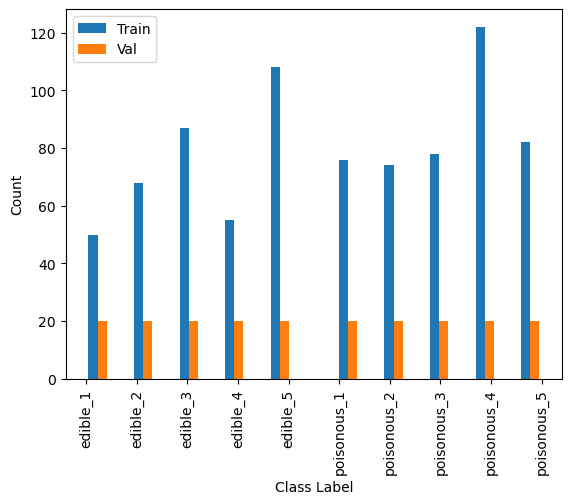

In [20]:
num_classes = len(trainval_dataset.classes)
class_labels = trainval_dataset.classes

train_labels = [data[1] for data in train_dataset]
val_labels = [data[1] for data in val_dataset]

plt.hist([train_labels, val_labels], bins = 20, label = ['Train', 'Val']) 
plt.xlabel('Class Label')
plt.legend()
plt.xticks([i for i in range(num_classes)], class_labels, rotation=90)
plt.ylabel('Count')
plt.show()

In [21]:
print(len(train_dataset))
print(len(val_dataset))

800
200


In [22]:
batch_size = 6

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers = 2)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,
                                          shuffle=False, num_workers = 2)

In [23]:
train_transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(degrees=10),
    
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.ColorJitter(brightness=0.05, contrast=0.05,saturation=0,hue=0),  # Subtle color variations check if

    transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.01),  # Add manual  Gaussian noise
   
 
])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.47938168..1.0206552].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.47562343..1.0140078].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.47940606..1.0159373].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.4783747..1.0078843].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.4798981..1.0054514].


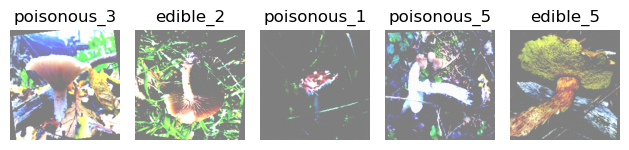

In [24]:
class_n = trainval_dataset.classes

# #visualise the train dataset with these transforms
data = next(iter(trainloader))
fig, ax = plt.subplots(1, 5)
for idx in range(5):
    im = data[0][idx]
    lbl = data[1][idx]
    im = train_transform(im)
    train_image = (im.numpy())/2 + 0.5
    label = class_n[lbl]
    train_image = np.moveaxis(train_image, 0, 2)
    ax[idx].imshow(train_image)
    ax[idx].set_axis_off()
    ax[idx].set_title(label.split('-')[-1])
plt.tight_layout()
plt.show()


In [25]:
dino = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #this line checks if we have a GPU available
dino.eval()
dino.to(device)

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /tmp/.cache/torch/hub/main.zip
/tmp/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/tmp/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/tmp/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_pretrain.pth" to /tmp/.cache/torch/hub/checkpoints/dinov2_vits14_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 152MB/s] 


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

In [26]:
for data in trainloader:
    inputs, labels = data

    inputs = inputs.to(device)
    
    feature = dino(inputs)

    print(feature.size())
    break

torch.Size([6, 384])


In [27]:
class DeepNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(384,256 )
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64 )
        self.fc4 = nn.Linear(64,32)
        self.fc5 = nn.Linear(32,10)

        self.relu=nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        y=  self.fc5(x)
       
        return y


Epoch 1 - training phase: 100%|██████████| 134/134 [00:20<00:00,  6.40it/s]


saving model at epoch 0 with  val accuracy 0.21 & train acc 0.18125 


Epoch 2 - training phase: 100%|██████████| 134/134 [00:21<00:00,  6.34it/s]


saving model at epoch 1 with  val accuracy 0.385 & train acc 0.32875 


Epoch 3 - training phase: 100%|██████████| 134/134 [00:21<00:00,  6.36it/s]


saving model at epoch 2 with  val accuracy 0.6 & train acc 0.52125 


Epoch 5 - training phase: 100%|██████████| 134/134 [00:21<00:00,  6.34it/s]


saving model at epoch 4 with  val accuracy 0.635 & train acc 0.6425 


Epoch 6 - training phase: 100%|██████████| 134/134 [00:21<00:00,  6.35it/s]


saving model at epoch 5 with  val accuracy 0.705 & train acc 0.72125 


Epoch 7 - training phase: 100%|██████████| 134/134 [00:20<00:00,  6.38it/s]


saving model at epoch 6 with  val accuracy 0.72 & train acc 0.71375 


Epoch 10 - training phase: 100%|██████████| 134/134 [00:21<00:00,  6.35it/s]


saving model at epoch 9 with  val accuracy 0.75 & train acc 0.81125 


Epoch 13 - training phase: 100%|██████████| 134/134 [00:21<00:00,  6.31it/s]


saving model at epoch 12 with  val accuracy 0.78 & train acc 0.855 


Epoch 30 - training phase: 100%|██████████| 134/134 [00:21<00:00,  6.25it/s]


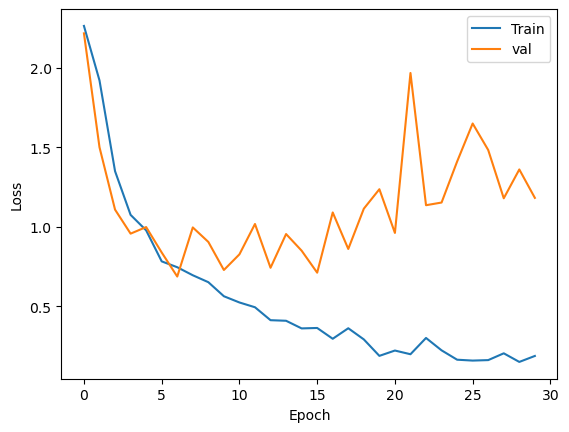

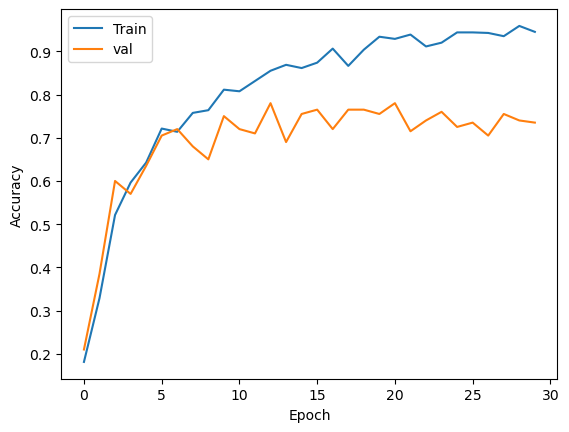

In [28]:
torch.manual_seed(0)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #this line checks if we have a GPU available

#any hyperparameters
lr = 0.003
total_epochs = 30

#Step 1: Initialise the model.
DN= DeepNet()
# Step 2: Define a loss function
criterion = nn.CrossEntropyLoss()
# Step 3: Initialise the SGD optimizer.
optimizer = optim.SGD(DN.parameters(), lr=lr, momentum=0.9)

# optimizer = optim.Adam(linear.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0,amsgrad=True)
# optimizer = torch.optim.AdamW(DN.parameters(), lr=lr,weight_decay=0.030)

#Step 4: For n epochs (e.g. loss converged/stops changing)
total_train_loss = []
total_train_acc = []
best_acc = 0
total_val_loss = []
total_val_acc = []

for epoch in range(total_epochs):    
    #Step 4A: Put the model in "train" mode
    DN.train() 

    #Step 4B: Training loop: For all batches in the training dataset
    train_loss = []
    correct = 0
    total = 0
    for i, data in  tqdm.tqdm(enumerate(trainloader, 0), total = len(trainloader), desc = f'Epoch {epoch+1} - training phase'):
        inputs, labels = data

        inputs = train_transform(inputs)
        
        inputs = inputs.to(device)
      

        optimizer.zero_grad()

        #reduce the image to  feature vectore with dino

        feature = dino(inputs)
        feature= feature.cpu()
        
        # pass through linear classifier
        outputs= DN(feature)
       
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        
        optimizer.step()

        train_loss += [loss.cpu().item()]
        
        predicted = torch.argmax(outputs, axis = 1)
        
        correct += torch.sum(predicted == labels).cpu().item()
        total += len(labels)

    mean_train_loss = np.mean(train_loss)
    train_accuracy = correct/total

    total_train_loss += [mean_train_loss]
    total_train_acc += [train_accuracy]
    
   


  
   
   
       #Step 4C: Put the model in "eval" mode
    DN.eval() 
    
    #Step 4D: Validation loop: For all batches in the validation dataset
    val_loss = []
    correct = 0
    total = 0
    for data in valloader:
        inputs, labels = data

        # inputs = train_transform(inputs)
        
        inputs = inputs.to(device)
        
        feature= dino(inputs)
        feature= feature.cpu()
    
        outputs = DN(feature)


        
        loss = criterion(outputs, labels)
        
  
        
   

        val_loss += [loss.cpu().item()]
        
        predicted = torch.argmax(outputs, axis = 1)
        mask_correct=predicted == labels
        correct += torch.sum(mask_correct).cpu().item()
        total += len(labels)

         
    mean_val_loss = np.mean(val_loss)
    val_accuracy = correct/total

    total_val_loss += [mean_val_loss]
    total_val_acc += [val_accuracy]

    if val_accuracy > best_acc:
        torch.save(DN.state_dict(),f'test.pth')
        best_acc=val_accuracy
        print(f'saving model at epoch {epoch} with  val accuracy {val_accuracy} & train acc {train_accuracy} ')


   


plt.plot(total_train_loss, label = 'Train')
plt.plot(total_val_loss, label = 'val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(total_train_acc, label = 'Train')
plt.plot(total_val_acc, label = 'val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## Consider: How many samples should we have in the validation dataset?

# 2) Finding performance on the val dataset

We're going to explore how to find:
1. Confusion matrix
    1. Total
    2. Grouped classes
2. Identifying precision and recall of grouped classes
3. The confidence calibration curve
   
## Create our model

We're going to use one of the ResNet18 models that I trained during the Week 5 tutorial.

To create the model for testing, we should:
1. Create the model
2. Adapt the architecture if necessary
3. Load in the saved weights
4. Put the model in eval mode
5. (Optional) move the model to the GPU

In [41]:
class DeepNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(384,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64 )
        self.fc4 = nn.Linear(64,10)
 

        self.relu=nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
       
        y = self.fc4(x)
        
       
        return y
        

# dino= torch.hub.load('facebookresearch/dinov2','dinov2_vits14')
# dino.eval()

        
# model=DeepNet()
# model.load_state_dict(torch.load('85.6.pth'))
# model.eval()


## Initialise the val dataloader

We're going to create with a batch size of 1, as this will make some of the precision/recall calculations easier later on.

In [42]:
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=1,
                                          shuffle=False, num_workers = 2)

## Creating a confusion matrix

As we saw in Week 2 and Week 3, we can use [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) from sklearn.metrics to create a confusion matrix.

To use the function, we need to pass in: 
- the GT label for each sample
- the predicted label for each sample
- (optional) display labels for each label (i.e. a list of class strings)
- (optional) normalize over 'true' or 'pred' labels to account for class imbalance

Below, let's first test our model over the val dataset and collect the GT label and predicted label for each sample.

In [43]:
import torch
import tqdm

# Load DINO model
dino = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dino.eval()

# Load custom model (DeepNet)
model = DeepNet()
model.load_state_dict(torch.load('test.pth'))
model.eval()

# Device setup (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dino = dino.to(device)
model = model.to(device)

Using cache found in /tmp/.cache/torch/hub/facebookresearch_dinov2_main


In [44]:
# DataLoader
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=2)

In [45]:
# Lists to store true and predicted values
true = []
predicted = []

# Iterate over validation data
for data in tqdm.tqdm(valloader):
    inputs, targets = data
    
    # Move inputs and targets to the correct device
    inputs = inputs.to(device)
    targets = targets.to(device)
    
    # Pass through DINO model first
    with torch.no_grad():  # Disable gradient calculation for inference
        dino_output = dino(inputs)
        
        # Flatten the DINO output if needed, depending on your DeepNet input
        dino_output = dino_output.view(dino_output.size(0), -1)
        
        # Pass DINO output through the custom model
        output = model(dino_output)
    
        # Get predicted class
        predicted_cls = torch.argmax(output, axis=1)
    
        # Store the true and predicted values
        true += targets.tolist()
        predicted += predicted_cls.tolist()

100%|██████████| 200/200 [00:02<00:00, 81.16it/s]


In [46]:
    print(predicted)

[0, 2, 0, 7, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 9, 3, 7, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 9, 6, 6, 6, 6, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 8, 8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 7, 9, 8, 9, 3, 2, 1, 9, 9, 4, 9, 2, 9, 0, 3, 6, 2, 6, 9, 9, 7, 9, 7, 9, 9, 9]


In [47]:
# inputs = torch.randn(batch_size, 384)  # Example input tensor
# print(inputs.shape)

Now, we can use the [ConfusionMatrixDisplay.from_predictions()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) function to create the confusion matrix.

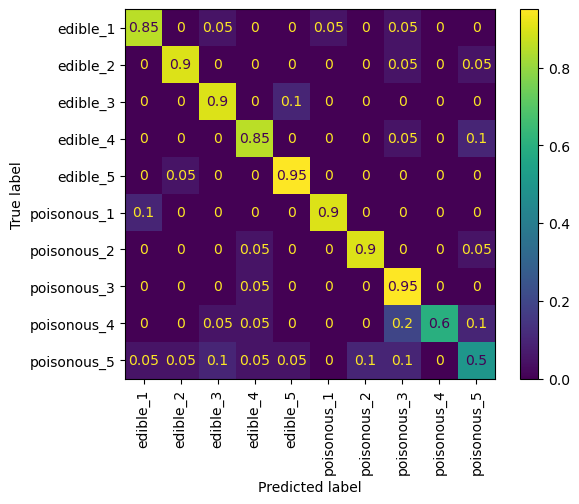

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(true,predicted,normalize='true', display_labels=trainval_dataset.classes,xticks_rotation='vertical')

plt.savefig('conf_matrix_1.png', bbox_inches='tight')


## Confusion Matrix with Grouped Classes

Sometimes, it's important to check the performance of a model with grouped classes. This can be really useful when not all types of mistakes are equal (e.g. Maybe it's better to confuse an Afghan Hound for a Bloodhound, than to confuse it for a Chihuahua).

**Let's check: How well does my model perform at distinguishing between 'hound' dogs and all other species of dog?**

Below, we're going to group performance into classifying hound species versus other species. A hound species is any dog species with the word 'hound' in its name.

In [49]:

# true=[]
# predicted=[]

# for data in  valloader:
#     inputs,targets=data
#     output=model(inputs)
#     predicted_cls= torch.argmax(output,axis=1)
#     predicted_label=class_labels[predicted_cls]

#     if 'poisonous'in predicted_label:
#         predicted+=[0]
#     else:
#         predicted+=[1]

#     gt_label=class_labels[targets]
#     if 'poisonous'in gt_label:
#         true+=[0]
#     else:
#         true+=[1]


    
   

In [59]:
# Lists to store true and predicted values
true = []
predicted = []

# Iterate over validation data
for data in tqdm.tqdm(valloader):
    inputs, targets = data
    
    # Move inputs and targets to the correct device
    inputs = inputs.to(device)
    targets = targets.to(device)
    
    # Pass through DINO model first
    with torch.no_grad():  # Disable gradient calculation for inference
        dino_output = dino(inputs)
        
        # Flatten the DINO output if needed, depending on your DeepNet input
        dino_output = dino_output.view(dino_output.size(0), -1)
        
        # Pass DINO output through the custom model
        output = model(dino_output)
    
        # Get predicted class
        predicted_cls = torch.argmax(output, axis=1)
        predicted_label=class_labels[predicted_cls]

        if 'poisonous'in predicted_label:
            predicted+=[0]
        else:
            predicted+=[1]
    
        gt_label=class_labels[targets]
        if 'poisonous'in gt_label:
            true+=[0]
        else:
            true+=[1]

    
      

100%|██████████| 200/200 [00:02<00:00, 81.04it/s]


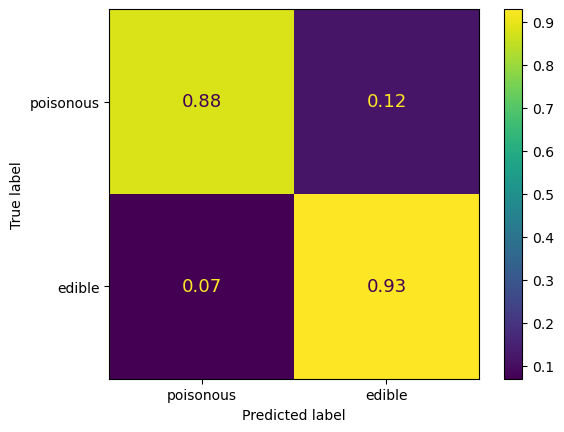

In [60]:
# from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(true,predicted,display_labels=['poisonous','edible'], normalize='true', text_kw={'fontsize':13})

plt.savefig('conf_matrix_2.png', bbox_inches='tight')


## Identifying Precision and Recall for Grouped Classes

Precision and recall allow us to nicely explain certain performance characteristics of a classifier for certain classes or groups of classes. To calculate, for a chosen 'positive' class, we need to find the number of:
- TP = When a positive class sample is correctly classified
- FP = When a different class sample is incorrectly classified as the 'positive' class
- FN = When a positive class sample is incorrectly classified as a different class

We can then calculate precision and recall with:
- $Precision = \frac{TP}{TP+FP}$
- $Recall = \frac{TP}{TP+FN}$

Let's use the values we've already collected for our binary confusion matrix to identify the precision and recall for the 'Hound' group of classes.

Below, calculate:
- What's the precision for positive class Hound?
- What's the recall for positive class Hound?
  

In [53]:
class_names = ['poisonous', 'edible']
pos_class = 0

tp = 0
fp = 0
fn = 0
#### Insert your code here that finds the TP, FP and FN counts for the 'Hound' positive class in the dataset

for i in range(len(true)):
    gt_i=true[i]
    pred_i= predicted[i]

    if gt_i==0 and pred_i==0:
        tp+=1

    if gt_i==0 and pred_i!=0:
        fn+=1

    if gt_i!=0 and pred_i==0:
        fp+=1


############################################################################################################
prec = tp/(tp+fp)
rec = tp/(tp+fn)

f1 = 2 * (prec * rec) / (prec + rec)


print('For the poisonous Class')
print(f'Precision: {100.*prec :.1f}%, Recall: {100.*rec :.1f}%')

# Print the F1-score
print(f'F1 Score (Poisonous Fungi): {f1 * 100:.2f}%')

For the poisonous Class
Precision: 92.6%, Recall: 88.0%
F1 Score (Poisonous Fungi): 90.26%


## Confidence Calibration Curves

As discussed in the Week 6 lecture, calibration curves are useful for understanding how well the confidence scores predicted by a classification model align with the actual accuracy of the model, which is critical in some applications where not just the label but also the uncertainty of the prediction is important. A well-calibrated model should have its predicted confidence probabilities close to the true probability that the prediction is correct.

To do this, we need to collect all our GT labels, predictions, and the confidence associated with each prediction.

**Note: This relies on class scores being converted to pseudo-probablities using the [torch.nn.function.softmax() function](https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html).**


In [54]:
# all_gt=[]
# all_pred=[]
# all_confidences=[]


# for data in  tqdm.tqdm(valloader):
#     inputs,targets=data

    
#     output=model(inputs)
#     predicted= torch.argmax(output,axis=1)
    
#     all_gt+=targets.tolist()
#     all_pred+=predicted.tolist()

#     softmax= torch.nn.functional.softmax(output)
#     confidence,predicted=torch.max(softmax,axis=1)
#     all_confidences+=confidence.tolist()
    

In [55]:
all_gt = []
all_pred = []
all_confidences = []

for data in tqdm.tqdm(valloader):
    inputs, targets = data

    # Move inputs and targets to the correct device
    inputs = inputs.to(device)
    targets = targets.to(device)

    # Pass through DINO model first
    with torch.no_grad():  # Disable gradient calculation for inference
        dino_output = dino(inputs)
        
        # Flatten the DINO output if needed, depending on your DeepNet input
        dino_output = dino_output.view(dino_output.size(0), -1)
        
        # Pass DINO output through the custom model
        output = model(dino_output)

        # Get the predicted class and confidence scores
        predicted = torch.argmax(output, axis=1)
        
        # Compute softmax to get probabilities
        softmax_output = torch.nn.functional.softmax(output, dim=1)
        confidence, predicted = torch.max(softmax_output, axis=1)

        # Append to respective lists
        all_gt += targets.tolist()  # Ground truth labels
        all_pred += predicted.tolist()  # Predicted class indices
        all_confidences += confidence.tolist()  # Confidence scores


100%|██████████| 200/200 [00:02<00:00, 82.93it/s]


Once completing the above code, you can run the next cell to see the confidence calibration curves.

## Consider: Is the model: well-calibrated, over-confident, or under-confident? Is it prone to giving a certain confidence more than others?

How would this inform the advice you give someone who wants to use the model?

/tmp/ipykernel_514/944786905.py:26: RuntimeWarning: invalid value encountered in scalar divide
  accuracy = correct/total


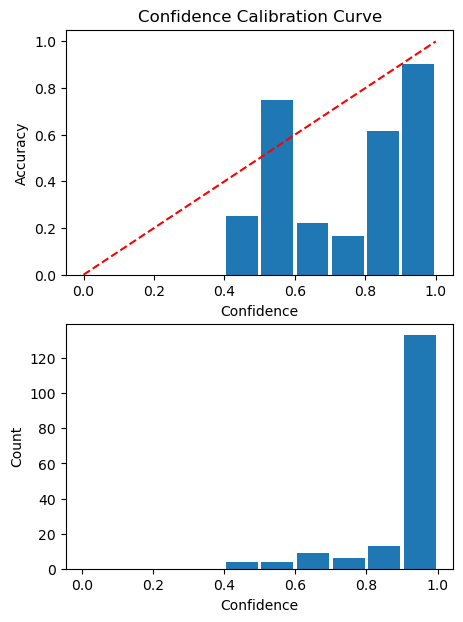

In [56]:
#create a variable that holds the confidence intervals we will check on a confidence calibration curve
conf_ranges = [[0, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80], [80, 90], [90, 100]] 

#convert our previously collected lists into numpy arrays so that we can easily manipulate them
all_pred_conf = np.array(all_confidences)
all_pred_class = np.array(all_pred)
all_gt_class = np.array(all_gt)

actual_accuracy = []
conf_level = []
conf_counts = []
for conf_int in conf_ranges:
    lower = conf_int[0]/100 #convert between 0-1
    upper = conf_int[1]/100 #convert between 0-1

    #create a mask that will collect predictions in the confidence interval -- it must be above the lower thresh AND below the upper thresh
    mask = (all_pred_conf >= lower) & (all_pred_conf < upper)
    
    #collect all predictions and GT data within the range using the mask
    preds = all_pred_class[mask]
    gt = all_gt_class[mask]
    
    #find the accuracy of this bin by checking how many correct/total
    correct = np.sum(preds == gt)
    total = len(preds)
    accuracy = correct/total
    actual_accuracy += [accuracy] #save the accuracy for this bin to plot later
    conf_level += [(upper + lower)/2] #this is the average confidence level for this confidence interval (not necessarily for the predictions in the bin though), we will use this for plotting later

    #how many samples in this bin?
    conf_counts += [len(preds)]


#Create a figure 
fig, ax = plt.subplots(2, 1, figsize = (5, 7))
ax[0].bar(conf_level, actual_accuracy, width = 0.09)
ax[0].plot([0, 1], [0, 1], 'r--') #our well-calibrated line
ax[0].set_xlabel('Confidence')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Confidence Calibration Curve')

ax[1].bar(conf_level, conf_counts, width = 0.09)
ax[1].set_xlabel('Confidence')
ax[1].set_ylabel('Count')

plt.savefig('Confidence_curve.png')
plt.show()

In [ ]:
import numpy as np



#import torch which has many of the functions to build deep learning models and to train them
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#import torchvision, which was lots of functions for loading and working with image data
import torchvision
import torchvision.transforms as transforms

import tqdm

class DeepNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(384,256 )
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64 )
        self.fc4 = nn.Linear(64,10)

        self.relu=nn.ReLU()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        y = self.fc4(x)
        
       
        return y



class MyClassifier():
    
    ''' Do not change the class name. Do not change any of the existing function names. You may add extra functions as you see fit.'''
    
    def __init__(self):
        self.class_labels = ['edible_1', 'edible_2', 'edible_3', 'edible_4', 'edible_5',
                            'poisonous_1', 'poisonous_2', 'poisonous_3', 'poisonous_4', 'poisonous_5']
        
        
    def setup(self):

        image_means=[0.42120951861354433,0.39622252713640727,0.32426305079647155]
        image_stds=[0.258645285220707,0.243852862060128,0.24828967822747286]
                
        ''' This function will initialise your model. 
            You will need to load the model architecture and load any saved weights file your model relies on.
        '''


        self.transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Resize((224, 224)), 
         transforms.Normalize(image_means, image_stds)])
    
        train_transform = transforms.Compose([
        transforms.RandomVerticalFlip(p=0.2),
        transforms.RandomRotation(degrees=10),
        
        transforms.RandomHorizontalFlip(p=0.2),
        transforms.ColorJitter(brightness=0.05, contrast=0.05,saturation=0,hue=0),  # Subtle color variations check if
    
        transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.005),  # Add manual  Gaussian noise
       
     
    ])



        
        self.dino= torch.hub.load('facebookresearch/dinov2','dinov2_vits14')
        self.dino.eval()

        
        self.model=DeepNet()
        self.model.load_state_dict(torch.load('test.pth'))
        self.model.eval()
        pass
        
    def test_image(self, image):
        ''' This function will be given a PIL image, and should return the predicted class label for that image. 
            Currently the function is returning a random label.
                
        '''
        im_tensor=self.transform(image).unsqueeze(0)
        feature=self.dino(im_tensor)
        prediction=self.model(feature)
        predicted_idx=torch.argmax(prediction)
        predicted_cls = self.class_labels[predicted_idx]
        
        return predicted_cls
        


In [ ]:
classifier = MyClassifier()
classifier.setup()

val_dataset_ims = torchvision.datasets.ImageFolder('trainval/')

class_list = ['edible_1', 'edible_2', 'edible_3', 'edible_4', 'edible_5',
                            'poisonous_1', 'poisonous_2', 'poisonous_3', 'poisonous_4', 'poisonous_5']

# print(val_dataset_ims.classes)
# print(classifier.class_labels)
correct = 0
total = 0    
for i, data in  tqdm.tqdm(enumerate(val_dataset_ims, 0), total = len(val_dataset_ims)):
    inputs, labels = data
    txt_label = class_list[labels]

    prediction = classifier.test_image(inputs)

    if prediction == txt_label:
        correct += 1
    total += 1
    
val_accuracy = correct/total
print(f'Validation accuracy is {100.*correct/total :.2f}')

In [ ]:

true = []
predicted = []


for data in tqdm.tqdm(valloader):
    inputs, targets = data
    
   
    inputs = inputs.to(device)
    targets = targets.to(device)
    
    # Pass through DINO model first
    with torch.no_grad():  # Disable gradient calculation for inference
        dino_output = dino(inputs)
        
        # Flatten the DINO output if needed, depending on your DeepNet input
        dino_output = dino_output.view(dino_output.size(0), -1)
        
        # Pass DINO output through the custom model
        output = model(dino_output)
    
        # Get predicted class
        predicted_cls = torch.argmax(output, axis=1)
    
        # Store the true and predicted values
        true += targets.tolist()
        predicted += predicted_cls.tolist()